In [83]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from  sklearn.metrics import silhouette_score 

In [54]:
df =pd.read_csv("data12_CreditCard_sample.csv")
df.sample(3)

,TOTAL_PURCHASES,PRC_CASH_ADVANCE,CREDIT_LIMIT,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
4714,693.90,0.0,1500.0,700.486647,0.090909
613,14332.93,0.0,16000.0,2117.186083,0.000000
5350,2000.61,0.0,6500.0,858.298082,0.000000


In [56]:
df.describe()

,TOTAL_PURCHASES,PRC_CASH_ADVANCE,CREDIT_LIMIT,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,2019.619398,0.381541,4522.091030,864.304943,0.159304
std,2950.021139,0.442971,3659.240379,2372.566350,0.296271
min,0.010000,0.000000,50.000000,0.019163,0.000000
25%,379.667727,0.000000,1600.000000,169.163545,0.000000
50%,1095.557789,0.000000,3000.000000,312.452292,0.000000
75%,2556.502427,0.953255,6500.000000,825.496463,0.166667
max,49597.746886,1.000000,30000.000000,76406.207520,1.000000


In [58]:
x = StandardScaler().fit_transform(df)
x

array([[-0.65230747, -0.86137261, -0.96257545, -0.30550763, -0.53772694],
       [ 1.49951204,  1.39624097,  0.67720406,  0.08768873,  0.21238001],
       [-0.42254327, -0.86137261,  0.81385235, -0.09990611, -0.53772694],
       ...,
       [-0.63569645, -0.86137261, -0.96257545, -0.32957217,  0.30614422],
       [-0.67225465,  1.39562711, -1.09922375, -0.34081076,  0.30614422],
       [-0.27096947, -0.62634214, -0.90791614, -0.32709767, -0.53772694]])

In [60]:
km = KMeans(n_clusters = 6, n_init = 25, random_state =101)
km.fit(x)
y_pred =km.predict(x)
y_pred


array([3, 5, 3, ..., 3, 1, 3])

In [61]:
km.inertia_

14753.799058601322

In [62]:
km.cluster_centers_

array([[-0.14051765, -0.77541838,  0.08041747, -0.28780607,  2.18310998],
       [-0.15172568,  1.19707826, -0.42761659, -0.05963349, -0.42406797],
       [ 6.95680859,  0.14344264,  2.49720089,  0.95300822,  0.55121571],
       [-0.35253826, -0.78425977, -0.3011274 , -0.13620411, -0.34412283],
       [-0.02092203,  0.06837699, -0.08485419,  9.22950294, -0.52768089],
       [ 1.05626696,  0.47539683,  1.5139984 ,  0.32819665, -0.41193222]])

In [66]:
from collections import Counter

cnt = Counter(np.sort(y_pred))
cnt

Counter({3: 3436, 1: 2572, 0: 1270, 5: 1233, 2: 69, 4: 56})

[Text(0.5, 1.0, 'Elbow plot'),
 Text(0.5, 0, 'number of clusters'),
 Text(0, 0.5, 'Total distance')]

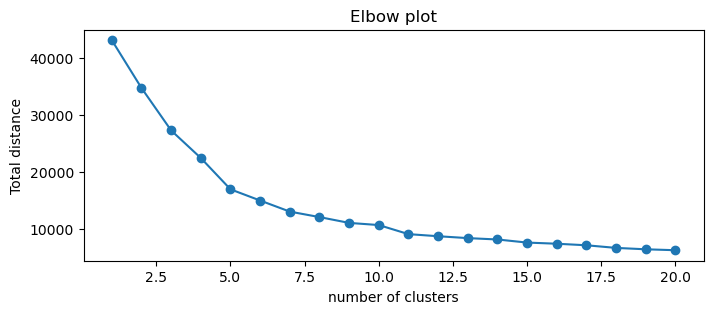

In [117]:
n_clusters = np.arange (1,21)
distances = np.zeros(n_clusters.shape[0])

for idx, nc in enumerate(n_clusters):
    model = KMeans(n_clusters = nc, random_state = 101)
    model.fit(x)
    distances[idx] = model.inertia_


fig, ax = plt.subplots(figsize =(8,3))
ax.scatter(n_clusters, distances)
ax.plot(n_clusters,distances)

ax.set(title = 'Elbow plot',xlabel = 'number of clusters', ylabel= 'Total distance')

In [68]:
km = KMeans(n_clusters = 4 , n_init =25, random_state =101)
km.fit(x)
y_pred = km.predict(x)
df['cluster'] = y_pred
df.sample(3)

,TOTAL_PURCHASES,PRC_CASH_ADVANCE,CREDIT_LIMIT,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,cluster
861,963.360000,0.000000,14000.0,142.613239,0.7,3
1875,405.139232,0.177838,12500.0,1634.990400,0.0,1
124,197.070000,0.000000,1000.0,509.384182,0.0,1


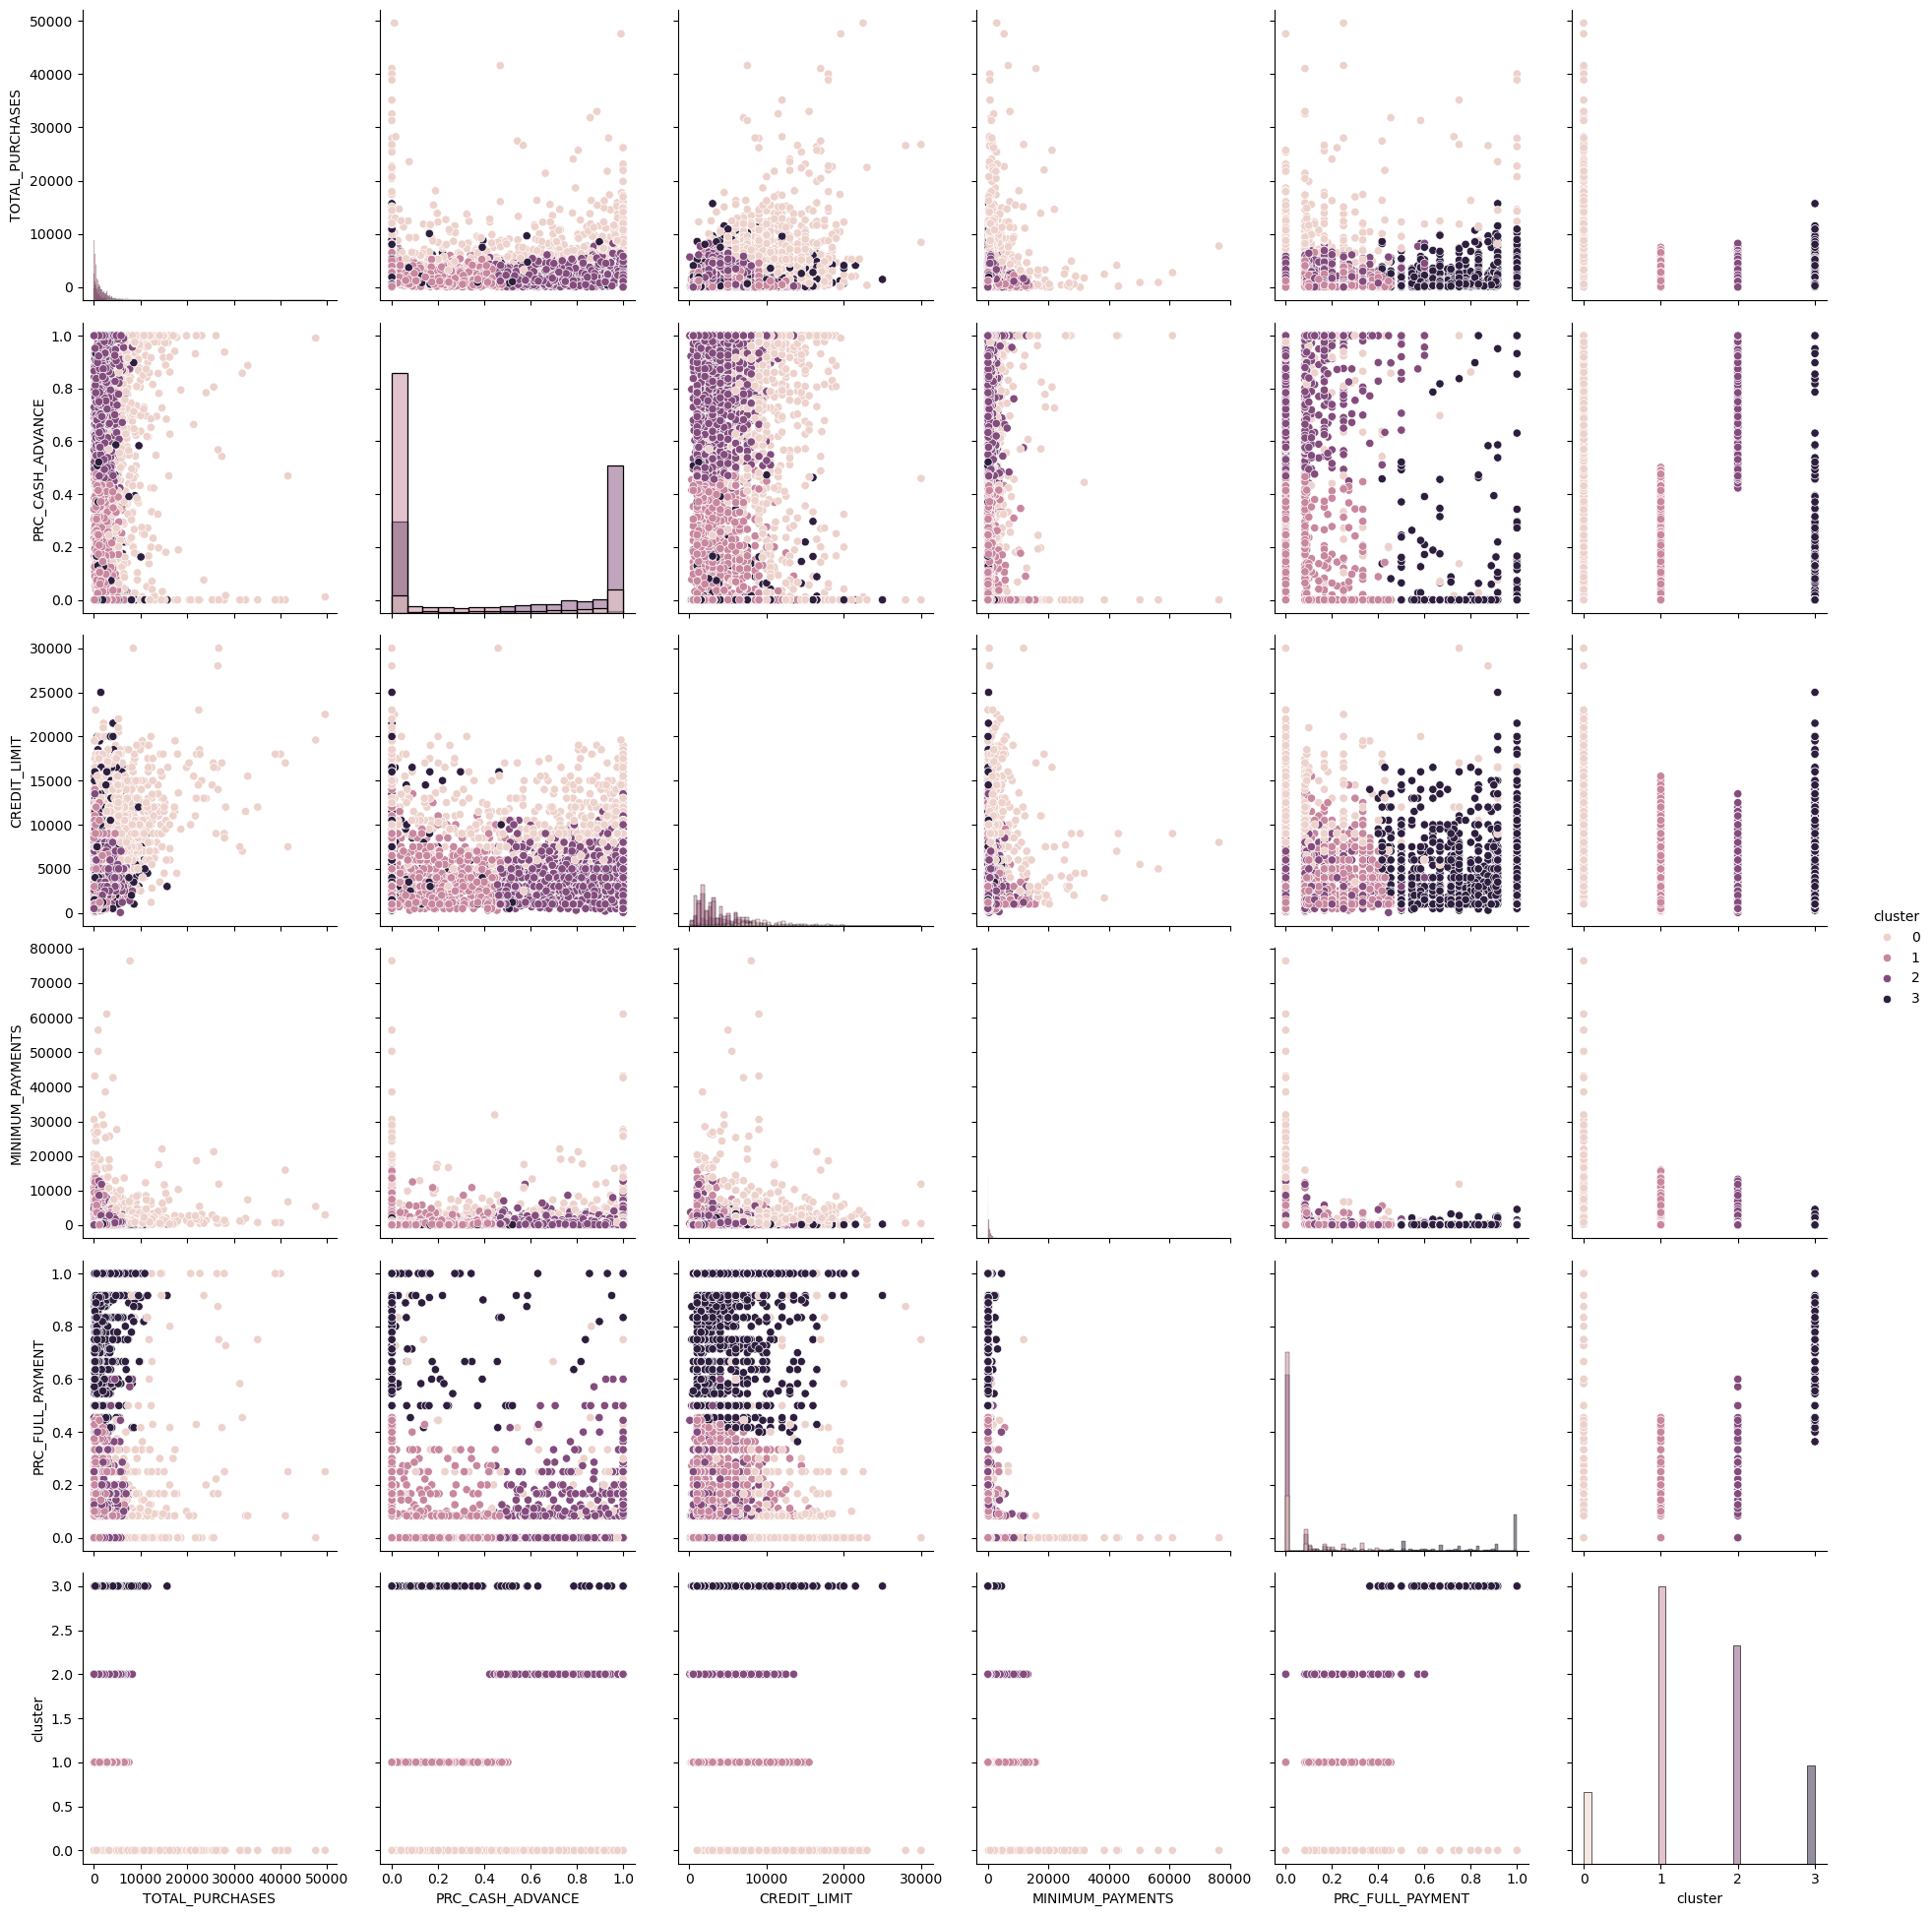

In [73]:
grid = sns.pairplot(df,vars =df.columns, hue ='cluster', diag_kind = 'hist')
grid.fig.set_size_inches(20,20)

In [81]:
ss = silhouette_score(x,y_pred)
print(f'Silhouette score = {ss:3f}')

Silhouette score = 0.398545


In [105]:
db = DBSCAN(eps = 0.5, min_samples =10)
db.fit(x)
db.components_

array([[-0.65230747, -0.86137261, -0.96257545, -0.30550763, -0.53772694],
       [-0.42254327, -0.86137261,  0.81385235, -0.09990611, -0.53772694],
       [-0.67922409, -0.86137261, -0.90791614, -0.26113056, -0.53772694],
       ...,
       [-0.63569645, -0.86137261, -0.96257545, -0.32957217,  0.30614422],
       [-0.67225465,  1.39562711, -1.09922375, -0.34081076,  0.30614422],
       [-0.27096947, -0.62634214, -0.90791614, -0.32709767, -0.53772694]])

In [119]:
print(f'Number of core points = {db.components_.shape[0]}')
print(f'Cluster labels = {np.unique(db.labels_)}')


Number of core points = 7472
Cluster labels = [-1  0  1  2  3]


In [95]:
cnt = Counter(np.sort(db.labels_))
cnt

Counter({0: 7810, -1: 781, 3: 20, 1: 16, 2: 9})

In [99]:
ss = silhouette_score(x,db.labels_)
print(f'Silhouette score = {ss:3f}')

Silhouette score = 0.194090


In [101]:
pca = PCA(n_components =2, random_state =101)
xpca = pca.fit_transform(x)
xpca

array([[-1.23838347e+00, -3.87349504e-01],
       [ 1.77643551e+00, -6.05274923e-05],
       [-3.40676659e-02,  3.55150368e-01],
       ...,
       [-1.41004749e+00,  1.84479918e-01],
       [-7.50060479e-01, -1.13249940e+00],
       [-8.97815339e-01, -3.97815295e-01]])

<function matplotlib.pyplot.show(close=None, block=None)>

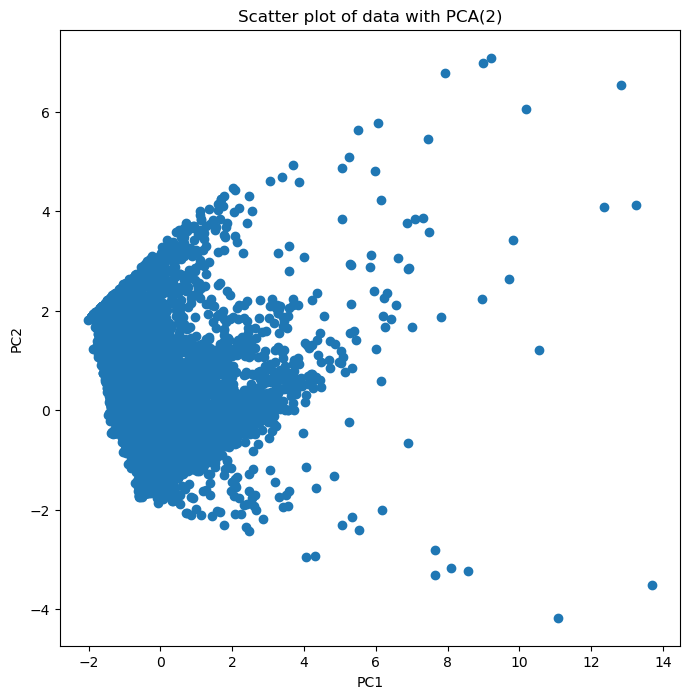

In [103]:
plt.figure(figsize =(8,8))
plot = plt.scatter(xpca[:,0],xpca[:,1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title('Scatter plot of data with PCA(2)')
plt.show